In [1]:
import pandas as pd

In [4]:
dataset=pd.read_csv('PatientCare.csv')

In [5]:
dataset.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [7]:
dataset.isna().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [10]:
gender = {'M':0,'F':1}
dataset['SEX']=dataset['SEX'].map(gender)

In [11]:
dataset.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,1,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,0,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,1,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,1,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,0,0


<Axes: xlabel='HAEMATOCRIT', ylabel='count'>

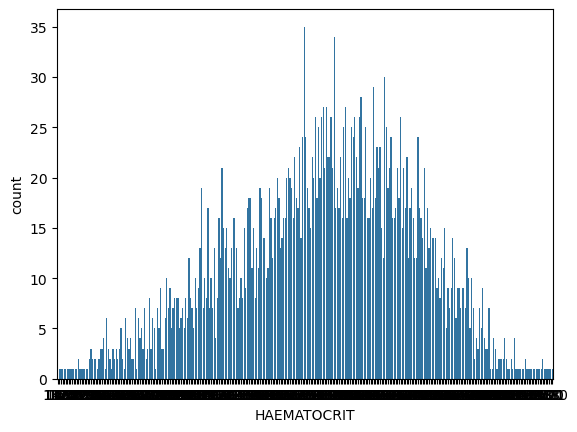

In [13]:
import seaborn as sns
sns.countplot(x='HAEMATOCRIT',data=dataset)

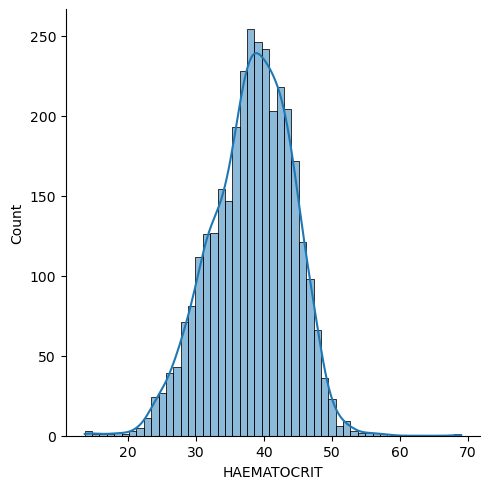

In [14]:
sns.displot(dataset['HAEMATOCRIT'],kde=True)

<Axes: xlabel='SEX', ylabel='count'>

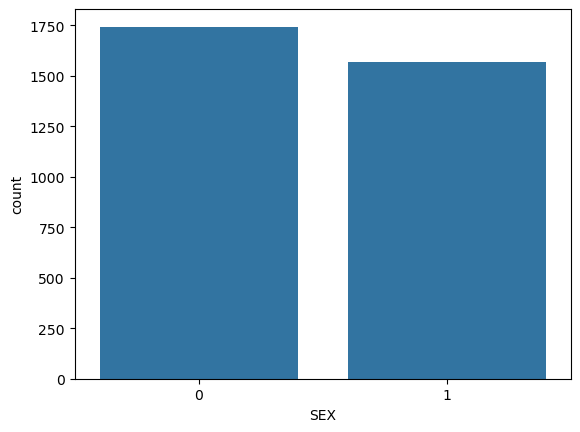

In [16]:
sns.countplot(x='SEX',data=dataset)

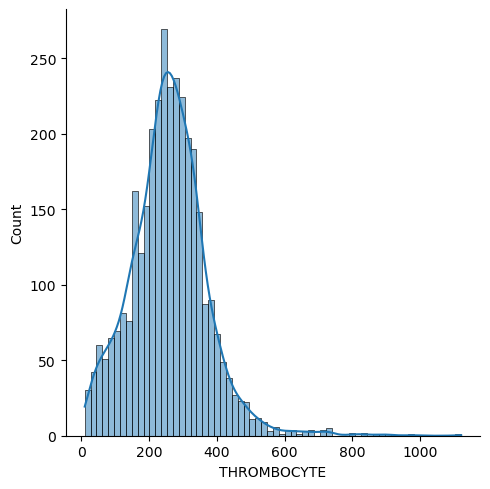

In [17]:
sns.displot(dataset['THROMBOCYTE'],kde=True)

In [18]:
dataset.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,1,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,0,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,1,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,1,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,0,0


In [31]:
#Indepedent and Dependent feature 
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [32]:
X.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,1
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,1
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,0


In [33]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: SOURCE, dtype: int64

In [35]:
X.shape

(3309, 10)

In [36]:
y.shape

(3309,)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)


In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model1=DecisionTreeClassifier()

In [42]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred=model1.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.6782477341389728

In [46]:
#Implementing model 2 - Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [51]:
model2 =RandomForestClassifier()
model2.fit(X_train,y_train)



RandomForestClassifier()

In [52]:
y_pred2 = model2.predict(X_test)

In [53]:
accuracy_score(y_pred2,y_test)

0.7220543806646526

In [56]:
#implementing model 3
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()
model3.fit(X_train,y_train)

C:\Users\klin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_pred3=model3.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred3)

0.702416918429003

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_pred,y_test)

array([[302, 123],
       [ 90, 147]], dtype=int64)

In [62]:
confusion_matrix(y_pred2,y_test)

array([[331, 123],
       [ 61, 147]], dtype=int64)

In [63]:
confusion_matrix(y_pred3,y_test)

array([[346, 151],
       [ 46, 119]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       425
           1       0.54      0.62      0.58       237

    accuracy                           0.68       662
   macro avg       0.66      0.67      0.66       662
weighted avg       0.69      0.68      0.68       662



In [68]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       454
           1       0.54      0.71      0.62       208

    accuracy                           0.72       662
   macro avg       0.69      0.72      0.70       662
weighted avg       0.75      0.72      0.73       662



In [69]:
print(classification_report(y_pred3,y_test))


              precision    recall  f1-score   support

           0       0.88      0.70      0.78       497
           1       0.44      0.72      0.55       165

    accuracy                           0.70       662
   macro avg       0.66      0.71      0.66       662
weighted avg       0.77      0.70      0.72       662



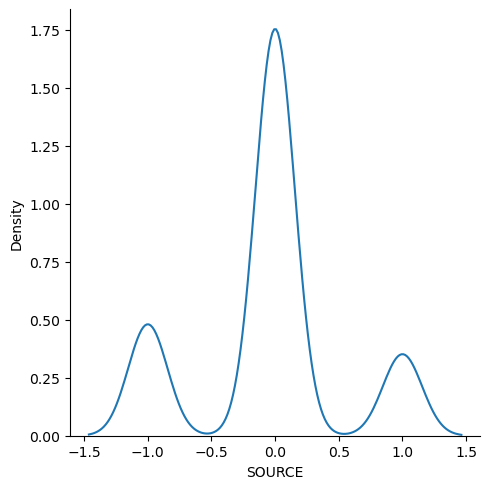

In [70]:
sns.displot(y_pred-y_test,kind='kde')

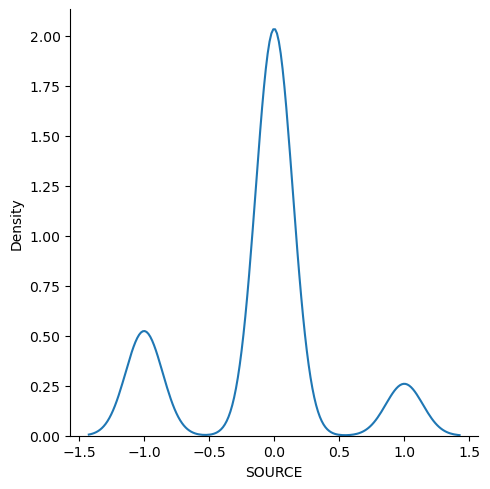

In [71]:
sns.displot(y_pred2-y_test,kind='kde')

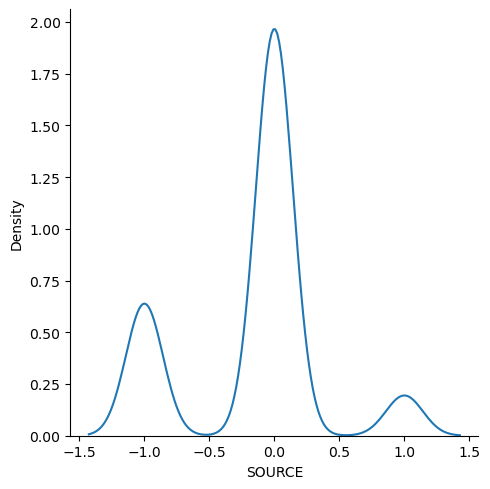

In [72]:
sns.displot(y_pred3-y_test,kind='kde')

In [73]:
import pickle 

In [76]:
filename='RandomForestClassifier.pkl'

In [77]:
pickle.dump(model2,open(filename,'wb'))